# Object Oriented Thinking - Multiple Inheritance

In the previous article, I had touched upon the basic implementation of the OOPs concept of Inheritance in Python. The article also touched upon the idea of super() function. 

Simple Inheritance Github Link : https://github.com/arvindhhp/PyPro_ahhp/blob/main/Part_015a_OOP_Simple_Inheritance.ipynb

Simple Inheritance Medium Link : https://arvindhhp.medium.com/object-oriented-thinking-inheritance-ae912642de37

In this notebook, I have dived a bit into depths of super(),  MULTIPLE Inheritance and function OVER-RIDING. 

Take a deep breath and Brace youselves, get ready to dive into Inheritance. Happy Inheritance (:

realpython.com, Thanks again for some thoughtful insights.

## Ideology of MULTIPLE INHERITANCE

In simple inheritance, we have ONE CHILD class inheriting information from ONE PARENT CLASS. It is a 1 to 1 relation. But in case of INHERITANCE, ONE CHILD class inherits information from TWO OR MORE PARENT classes.

Pictorially, this is how they look. The left link, represents SIMPLE Inheritance while the right link merge represents MULTIPLE Inheritance. 

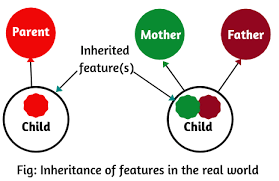

(Image source: scientecheasy.com)

## What is super() 

Now, with the fundamental understanding of what inheritance, how it is implemented in Python (at least simple one) and the difference between SIMPLE and MULTIPLE inheritance, I strongly feel, you are in a good state to understand, what super() actually is ?

From a broader perspective, at a higher level, super() gives you access to methods in a superclass from the subclass that inherits from it.

super() without any appended functionalities returns a temporary object of the SUPER class (also known as PARENT class). This temporary object can then be used to call the methods of the SUPER class. 

This is similar to the procedure of accessing the methods belonging to a class outside the class using <classname>.<methodname>; here instead <super()>.<methodname> is used to call the respective SUPER class of the CHILD class from within the CHILD class. 

## super() in SIMPLE Inheritance

### SUPER and CHILD Class Defintion

To understand this, let us consider a bunch of classes, where the 'square' class inherits from the 'polygon' class. Here, 'polygon' class is the SUPER class whereas 'square' class is the CHILD class. The code block below contains the definitions of SUPER and CHILD classes.

In [1]:
#SUPER Class (PARENT CLass) Definition

class polygon:
    def __init__(self, sides):
        
        self.num_sides=sides
        self.len_sides=[]
        self.length_sides_inputs()
        self.perimeter=self.perimeter_calc()
    
    def length_sides_inputs(self):
        
        print('\n')
                
        for i in range(self.num_sides):
            try:
                length=input(f'Enter the length of SIDE {i} of the Polygon ')
                length=int(length)
                self.len_sides.append(length)
                
            except ValueError as e:
                
                print(f'Error occured\n{e}\n, Please enter a Numerical value')
                
        print(f'The lengths of the sides are : {self.len_sides}')
    
    def perimeter_calc(self):
        
        self.perimeter=sum(self.len_sides)
        return self.perimeter
        
    def __str__(self):
        
        return f'\nPolygon Perimeter Estimator Class, Entered Polygon has {self.num_sides} sides\n'


#CHILD Class Definition

class square(polygon):
    
    def __init__(self,sides):
        super().__init__(sides)
        self.square_area=self.sq_area()
        print(self.__str__())
        
    def sq_area(self):
        area=float((self.perimeter/4)**2)
        return area
        
    def __str__(self):
        return f'\nEstimated area of a Sqaure is {self.square_area}\n'

## What is the super() doing ?

In Line 41, the 'square' class definition above has an __init__() that has two parameters. First one 'self' is a pointer that points to the class itself. The next one is another parameter 'sides'. Nothing new, just like any other __int__().

In Line 42, the expression, another __init__() is mentioned, but this time, this is a function call prefixed by super() through DOT notation. 

We know that, super() returns the temporary object of the SUPER class of the CHILD class from where it is getting called. In this case, super() is called from 'square' class which is inherited from 'polygon' class. The expression in Line 42, calls the __init__() of the 'polygon' class. And correspondingly, we also need to ensure the correct arguments are supplied in line with SUPER class's __init__() parameter definition.

super() is not restricted to just the __init__(), it can be used to call any method of the SUPER class from within the CHILD class

Simple, right ?? Now let us intialize the 'square' class and see what is happening.

In [2]:
square_demo=square(4)



Enter the length of SIDE 0 of the Polygon 5
Enter the length of SIDE 1 of the Polygon 5
Enter the length of SIDE 2 of the Polygon 5
Enter the length of SIDE 3 of the Polygon 5
The lengths of the sides are : [5, 5, 5, 5]

Estimated area of a Sqaure is 25.0



## More on super() 

Until now, we have been using super() parameter-less. 

Well, it can take two optional parameters, the CHILD class whose SUPER class we are trying to reach and a pointer to the CHILD class itself. 

In [3]:
class super_example(polygon):
    def __init__(self,sides):
        super(super_example,self).__init__(self)
        
#In line 4, super_example is the CHILD class whose SUPER class we are trying to reach, which is 'polygon' class
#The pointer 'self' is an instance pointing at this super_example CHILD class
#super() in the previous code block and super(super_example,self) perform the same action

super() can also be used to reach the higher PARENT classes by skipping levels. 

To understand this better, let me define a SIMPLE Inheritance of 3 classes in sequence.

In [4]:
#Sequential SIMPLE Inheritance

class grand_parent:
    def __init__(self):
        self.a=10
    def gprnt_method(self):
        print('This is "grand_parent", the highest level class\n')

class parent(grand_parent): #Inheriting attributes and methods from the 'grand_parent' class
    def __init__(self):
        self.b=20
    def prnt_method(self):
        print('This is "parent", the CHILD of highest level class "grand_parent"\n')

class child(parent): #Inheriting attributes and methods from the 'parent' class
    def __init__(self):
        self.c=30
        print('Accessing higher level class Methods using super() from "child" class\n')
        super(parent,self).gprnt_method() #Using super() to reach higher level classes
    
    def child_method(self):
        print('This is "child", the CHILD of mid level class "parent"\n')
        
        
#'child' class Initialisation

child_=child()

Accessing higher level class Methods using super() from "child" class

This is "grand_parent", the highest level class



The 'child' class defined above is inherited from 'parent' which is inherited from 'grand_parent'. 

super() can also be used to call the gprnt_method() from grand_parent class. This can be achieved by passing 'parent' as the class name within the super() 

This is handy when one of the methods of a higher level class is over-ridden in any of its child classes, but we want to access the pre-over ridden version of the method. Let us discuss one last concept of "method OVER-RIDING" before we go ahead and understand MULTIPLE Inheritance

## Method OVER-RIDING

As name says, the concept is about overriding the method defined in a PARENT class through a child class.

In [5]:
#OVER-RIDING the child_method() from 'child' class

class childs_child(child):
    def __init__(self):
        print('Executing the actual "child_method"\n')
        super().prnt_method() #calling child_method from PARENT class (SUPER Class)
        print(self.child_method()) #calling child_method from the CHILD class itself
        
    def child_method(self):
        return '\nOver Riding the child_method of "child class" through childs_child class'
    
override_example=childs_child()

Executing the actual "child_method"

This is "parent", the CHILD of highest level class "grand_parent"


Over Riding the child_method of "child class" through childs_child class


### What just happened here ???

'child'class already has a child_method(). On definig a new method with same, the method of the SUPER Class gets overridden. Here, child_method defined inside the childs_child class overrides the orignal method defined in the 'child' class. Be careful, on doing this, any update done to the PARENT class method will not reflect for this over riding CHILD class and its downstream CHILD classes.

Bottom line, if super(<class>,<pointer>) is used, it will go ahead and call the method corresponding to the PARENT of this CHILD <class>

## MULTIPLE INHERITANCE

And, finally, we are here, the last topic, Congratulations for making this far ;-)

As we had already discussed, in MULTIPLE inheritance, MUTLIPLE PARENTS share all their information to ONE CHILD. 

Let us use a dummy set of classes to understand this. 

In [6]:
#PARENT 1 Defintion

class mother:
    def __init__(self, a):
        self.val_a=a
        print(self.mother_method())
    def mother_method(self):
        return 'This is a method defined in Mother Class'

#PARENT 2 Defintion

class father:
    def __init__(self, b, c):
        self.val_b=b
        self.val_c=c
        print(self.father_method())
    def father_method(self):
        return 'This is a method defined in Father Class'

In [7]:
# CHILD Defintion

class child(mother,father): #Notice, mutliple PARENT classes specified
    def __init__(self,a,b,c):
        super().__init__(a)
        super(mother,self).__init__(b,c)

Well, well, well, what did I just do in the code block above. Unfortunately, MULTIPLE INHERITANCE is slightly tricky. Unlike, SIMPLE inheritance, which has just one PARENT, using super() was pretty straightforward. But in case of MULTIPLE inheritance, we have multiple PARENTs. super() will follow what the METHOD RESOLUTION ORDER (MRO) says. MRO is just a list of classes that Python will refer when it comes across two methods with same name. And we all know, to initialize a class, we all use a class with the same name __init__()

By default, Python interpreter gives priorities in the sequence of PARENT class definition in the inheritance statement. See line 3 of the code block above. The 'child' class takes 'mother' as the FIRST PARENT class and 'father' as the SECOND PARENT class. Hence, the parameter-less super() will end up initialising the __init__() of 'mother' class. 

Okay, but how I have mutliple parents here, what do I do to initialise the other PARENTS. super() with arguments comes to the rescue here. Just define super() with the PARENT class and its pointer itself as arguments which has already been initialised. 

When any new classes are defined, all these are by default objects of the main SUPER class. Literally all the classes have some default PARENT. Once this is done, the interpreter will go and look for the next available __init__() in the main SUPER class which would be nothing but the second PARENT's __init__(). Let us not get too much into this for now. Similarly, if the CHLD class has many parents, write super() statements by keeping on updating the argument CLASS name in sequential expressions.

Be careful, the same issue will pop up for all the methods. A good code should ensure, redundant names should not be used for the features of classes which are related to each other some way. In that case, the MRO will not affect us,only one method with the specified identifier will exist in the code.

### Exection of MUTLIPLE Inheritance

In [8]:
mult_inher=child(10,20,30)
print('\n')

print(f'Value a from "mother" class is {mult_inher.val_a}')
print(f'Value b from "father" class is {mult_inher.val_b}')
print(f'Value c from "father" class is {mult_inher.val_c}')

This is a method defined in Mother Class
This is a method defined in Father Class


Value a from "mother" class is 10
Value b from "father" class is 20
Value c from "father" class is 30


## Method Resolution Order (MRO)

In [9]:
#MRO for any inherited class can be obtianed as shown
#Remember, the __mro__ attribute belongs to the class, not the class object

print(child.__mro__)

(<class '__main__.child'>, <class '__main__.mother'>, <class '__main__.father'>, <class 'object'>)


## Some additonal reading material on MULTIPLE inhertiance for the curious ones

https://stackoverflow.com/questions/9575409/calling-parent-class-init-with-multiple-inheritance-whats-the-right-way